# Logistic Regression

### Importing the required python Modules 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Loading the data from `data1.txt` using [np.loadtext](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) into an [np.ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)  called `data`

In [2]:
data = np.loadtxt("data1.txt",delimiter=',')
print("The file \"{0}\" contains Data of Dimenson \"{1}\" and shape \"{2}\" ".format("data1.txt",data.ndim,data.shape))

The file "data1.txt" contains Data of Dimenson "2" and shape "(100, 3)" 


### Creating `x` and `y` from `data`

In [3]:
n_samples, n_features = data.shape
x = data[:,[0,1]].reshape(n_samples,n_features-1)
y = data[:,1].reshape(n_samples,1)
rowx,columnx = x.shape
rowy,columny = y.shape
print("\"x\" is a matrix of order \"{0}x{1}\" ".format(rowx,columnx))
print("\"y\" is a matrix of order \"{0}x{1}\" ".format(rowy,columny))

"x" is a matrix of order "100x2" 
"y" is a matrix of order "100x1" 


### Modifying `x` to have the first column full of 1s using [np.ones](https://numpy.org/doc/stable/reference/generated/numpy.ones.html) and [np.append](https://numpy.org/doc/stable/reference/generated/numpy.append.html).

In [4]:
ones = np.ones((n_samples,1),dtype=int)
x = np.append(ones,x,axis = 1)
rowx,columnx = x.shape
print("\"x\" is a matrix of order \"{0}x{1}\"\n ".format(rowx,columnx))
print("first 10 rows of \"x\"")
print(x[0:10,:])

"x" is a matrix of order "100x3"
 
first 10 rows of "x"
[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]
 [ 1.         45.08327748 56.31637178]
 [ 1.         61.10666454 96.51142588]
 [ 1.         75.02474557 46.55401354]
 [ 1.         76.0987867  87.42056972]
 [ 1.         84.43281996 43.53339331]]


### Seting up Gradient Descent parameters
use [np.zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html) to create `theta`

In [5]:
theta = np.zeros((columnx)) 
iterations = 1500
alpha = 0.01

### Writing a function to calculate Sigmiod of an array

In [6]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

### Plotting the `sigmoid` function

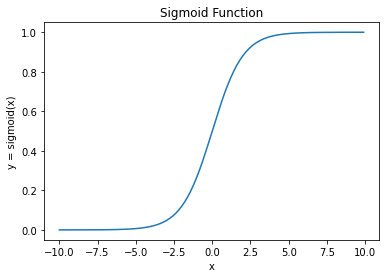

In [7]:
x1 = np.arange(-10,10,0.1)
y1 = sigmoid(x1)
plt.plot(x1,y1)
plt.xlabel("x")
plt.ylabel("y = sigmoid(x)")
plt.title("Sigmoid Function")
plt.show()

In [8]:
a = np.array([-1000,0,1000])
print(sigmoid(a))

[0.  0.5 1. ]


<ipython-input-6-c5ba67ba2ae9>:2: RuntimeWarning: overflow encountered in exp
  g = 1/(1+np.exp(-z))


we get the following error for large values of **z<sub>*i*</sub>** :  
`<ipython-input-20-c5ba67ba2ae9>:2: RuntimeWarning: overflow encountered in exp
  g = 1/(1+np.exp(-z))`  
but we are able to get the answer we need. for more info read [here](https://stackoverflow.com/questions/40726490/overflow-error-in-pythons-numpy-exp-function)

### Alternative to `sigmoid` : [scipy.special.expit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.expit.html)

In [9]:
from scipy.special import expit

print(expit(a))

[0.  0.5 1. ]


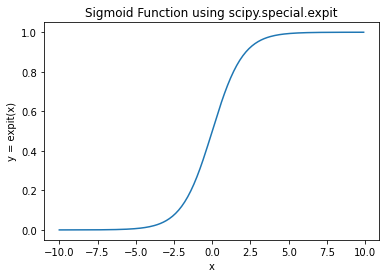

In [10]:
x2 = np.arange(-10,10,0.1)
y2 = expit(x2)
plt.plot(x2,y2)
plt.xlabel("x")
plt.ylabel("y = expit(x)")
plt.title("Sigmoid Function using scipy.special.expit")
plt.show()

### Writing a function called *cost* to compute the Cost Function for Logistics Regression


In [11]:
def cost(x,y,theta):
    m = len(y)
    h = sigmoid(x.dot(theta))
    j = (((-y.T).dot(np.log(h)))-((1-y.T).dot(np.log(1-h))))/m
    grad = ((x.T.dot(h-y)))/m
    return j,grad

### Testing the `cost` function

In [12]:
x1 = np.array([[1,8,1,6],[1,3,5,7],[1,4,9,2]])
y1 = np.array([[1],[0],[1]])
theta1 = np.array([[-2],[-1],[1],[2]])
j,grad = cost(x1,y1,theta1)
print("J:")
print(j)
print("\nGradient:")
print(grad)

J:
[[4.68316655]]

Gradient:
[[0.31722075]
 [0.87231544]
 [1.6481235 ]
 [2.23787228]]


### Writing a function called *costReg* to compute the Regularized Cost Function for Logistics Regression 


In [13]:
def costReg(x,y,theta,Lambda):
    m = len(y)
    h = sigmoid(x.dot(theta))
    theta[0] = 0
    j = (((-y.T).dot(np.log(h)))-((1-y.T).dot(np.log(1-h))))/m + Lambda*(np.sum(np.square(theta)))/(2*m) 
    grad = ((x.T.dot(h-y))+Lambda*theta)/m
    return j,grad

### Testing the `costReg` function


In [14]:
j,grad = costReg(x1,y1,theta1,4)
print("J:")
print(j)
print("\nGradient:")
print(grad)

J:
[[8.68316655]]

Gradient:
[[ 0.31722075]
 [-0.46101789]
 [ 2.98145684]
 [ 4.90453895]]


In [15]:
import scipy.optimize as opt

In [25]:
def Cost(theta,x,y):
    print("x:",str(x.shape))
    print("y:",str(y.shape))
    print("theta:",str(theta.shape))
    m = len(y)
    h = sigmoid(x.dot(theta))
    j = (((-y.T).dot(np.log(h)))-((1-y.T).dot(np.log(1-h))))/m
    return j
def Grad(theta,x,y):
    print("x':",str(x.shape))
    print("y':",str(y.shape))
    print("theta':",str(theta.shape))
    m = len(y)
    h = sigmoid(x.dot(theta))
    grad = ((x.T.dot(h-y)))/m
    return grad

In [21]:
# result  = op.fmin_bfgs(f=Cost,x0=theta,fprime=Grad,args=(x,y))

In [26]:
rslt = opt.minimize(fun = Cost,x0=theta, args=(x,y),method ='BFGS',jac = Grad  ) 

x: (100, 3)
y: (100, 1)
theta: (3,)
x': (100, 3)
y': (100, 1)
theta': (3,)


ValueError: shapes (3,100) and (3,100) not aligned: 100 (dim 1) != 3 (dim 0)